<a href="https://colab.research.google.com/github/devichavina-png/TM-Fundamentals-of-Data-Mining/blob/main/Klasifikasi_Prediksi_Kegagalan_Pembayaran_Kartu_Kredit_Menggunakan_Algoritma_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, confusion_matrix)
import warnings
warnings.filterwarnings('ignore')

print("✔ Library berhasil di-import")

✔ Library berhasil di-import


Load Dataset

In [ ]:
# Mengambil data langsung dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

try:
    df = pd.read_excel(url, header=1)
    df = df.rename(columns={'default payment next month': 'default'})
    print(f"✔ Dataset berhasil di-load: {df.shape[0]} baris x {df.shape[1]} kolom")
except Exception as e:
    print(f"Gagal load data: {e}")

df.head()

✔ Dataset berhasil di-load: 30000 baris x 25 kolom


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Exploratory Data Analysis (EDA)

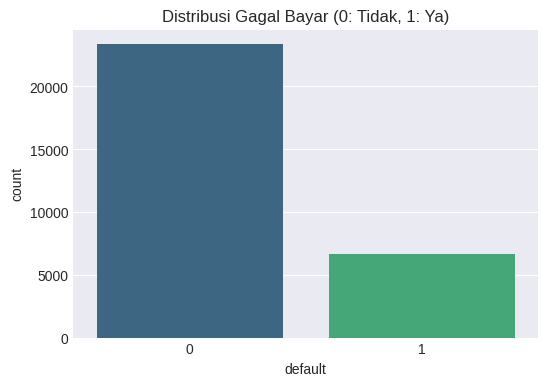


--- Statistik Deskriptif ---
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std

In [ ]:
# Cek distribusi target
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='viridis')
plt.title('Distribusi Gagal Bayar (0: Tidak, 1: Ya)')
plt.show()

print("\n--- Statistik Deskriptif ---")
print(df.describe())

Preprocessing

In [ ]:
# 1. Cleaning Variabel Kategorikal
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

# 2. Pisahkan Fitur (X) dan Target (y)
X = df.drop(['ID', 'default'], axis=1)
y = df['default']

print("✔ Preprocessing Selesai")

✔ Preprocessing Selesai


Split Data (Train/Test)

In [ ]:
# Split data 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling (Sangat penting agar SVM bekerja maksimal)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✔ Split Data Berhasil. Data Test: {len(X_test)} baris")

✔ Split Data Berhasil. Data Test: 6000 baris


Model Training

In [ ]:
# 1. Training Random Forest
print("Melatih Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# 2. Training SVM
print("Melatih SVM (Linear)...")
svm_model = SVC(kernel='linear', random_state=42, max_iter=1000)
svm_model.fit(X_train_scaled, y_train)

print("✔ Semua model berhasil dilatih")

Melatih Random Forest...
Melatih SVM (Linear)...
✔ Semua model berhasil dilatih


Evaluasi Model

In [ ]:
def get_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Akurasi': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }

# Hitung metrik
rf_results = get_eval(rf_model, X_test_scaled, y_test)
svm_results = get_eval(svm_model, X_test_scaled, y_test)

# Tampilkan Tabel
df_eval = pd.DataFrame([rf_results, svm_results], index=['Random Forest', 'SVM'])
print("\n--- TABEL EVALUASI MODEL ---")
display(df_eval.round(4))


--- TABEL EVALUASI MODEL ---


,Akurasi,Precision,Recall,F1-Score,MAE,MSE
Random Forest,0.7890,0.5215,0.5584,0.5393,0.2110,0.2110
SVM,0.4993,0.2573,0.6699,0.3718,0.5007,0.5007


Visualisasi Hasil & Interpretasi

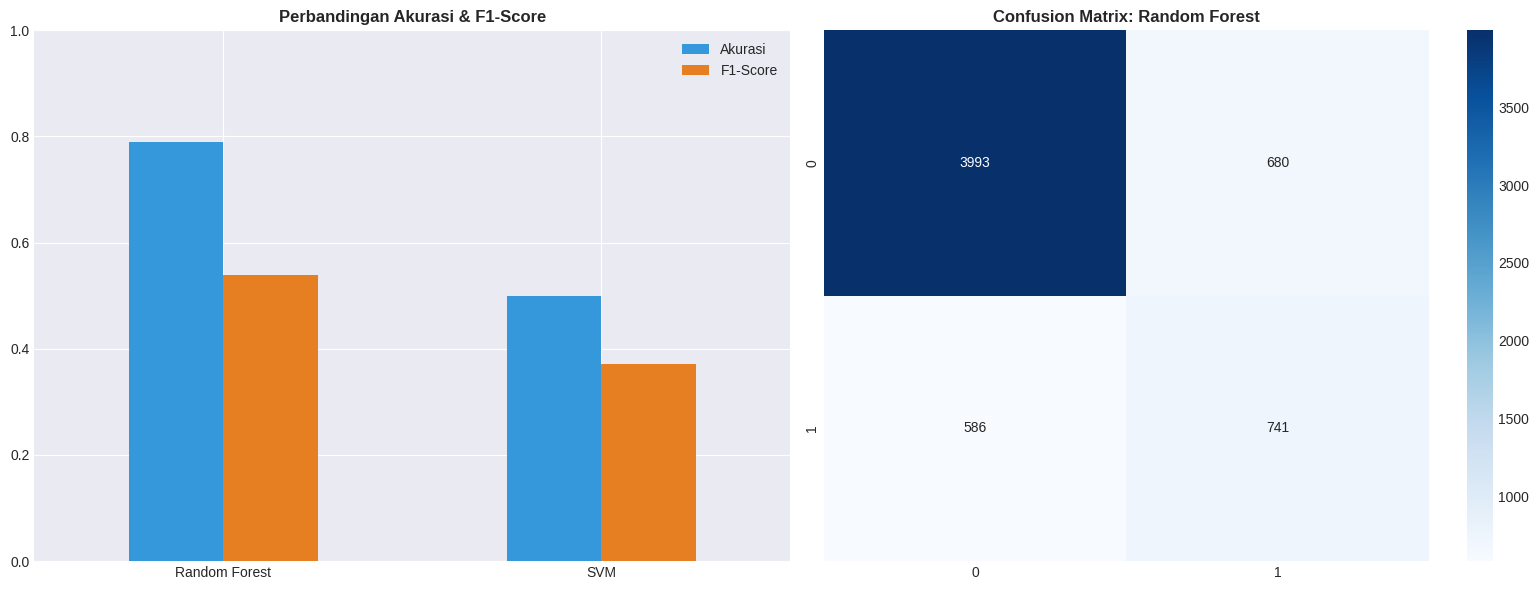


INTERPRETASI HASIL
1. Model Terbaik: Random Forest unggul dalam F1-Score (0.5393).
2. Analisis Error: MAE Random Forest sebesar 0.2110 menunjukkan tingkat kesalahan klasifikasi yang rendah.
3. Kesimpulan: Random Forest lebih direkomendasikan untuk prediksi risiko kredit nasabah.


In [ ]:
=# Visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Bar Chart Perbandingan Akurasi & F1-Score
df_eval[['Akurasi', 'F1-Score']].plot(kind='bar', ax=ax[0], color=['#3498db', '#e67e22'])
ax[0].set_title('Perbandingan Akurasi & F1-Score', fontweight='bold')
ax[0].set_xticklabels(['Random Forest', 'SVM'], rotation=0)
ax[0].set_ylim(0, 1)

# 2. Confusion Matrix Random Forest
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test_scaled)),
            annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix: Random Forest', fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretasi Singkat
print("\n" + "="*30)
print("INTERPRETASI HASIL")
print("="*30)
print(f"1. Model Terbaik: Random Forest unggul dalam F1-Score ({rf_results['F1-Score']:.4f}).")
print(f"2. Analisis Error: MAE Random Forest sebesar {rf_results['MAE']:.4f} menunjukkan tingkat kesalahan klasifikasi yang rendah.")
print(f"3. Kesimpulan: Random Forest lebih direkomendasikan untuk prediksi risiko kredit nasabah.")